## ATM433/533 Midterm Notebook 2: NYSM/ASOS Current Temperatures

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt

Read in the NYSM and NY ASOS data files. The latter uses one or more whitespaces as its column separator, while the former uses commas.

In [2]:
nysmData = pd.read_csv('http://www.atmos.albany.edu/products/nysm/nysm_latest.csv')
asosData = pd.read_csv('http://www.atmos.albany.edu/products/metarCSV/ny_asos_latest.csv', sep='\s+')

Examine each `DataFrame`.

In [3]:
nysmData.head()

,station,time,temp_2m [degC],temp_9m [degC],relative_humidity [percent],precip_incremental [mm],precip_local [mm],precip_max_intensity [mm/min],avg_wind_speed_prop [m/s],max_wind_speed_prop [m/s],...,soil_temp_05cm [degC],soil_temp_25cm [degC],soil_temp_50cm [degC],soil_moisture_05cm [m^3/m^3],soil_moisture_25cm [m^3/m^3],soil_moisture_50cm [m^3/m^3],lat,lon,elevation,name
0,ADDI,2022-06-02 18:00:00,20.7,20.6,63.5,0.0,2.44,0.0,0.9,1.8,...,19.1,17.3,15.7,0.36,0.35,0.38,42.04036,-77.23726,507.6140,Addison
1,ANDE,2022-06-02 18:00:00,20.0,19.7,67.1,0.0,1.29,0.0,1.8,3.6,...,16.7,15.4,14.6,0.19,0.14,0.14,42.18227,-74.80139,518.2820,Andes
2,BATA,2022-06-02 18:00:00,20.5,20.1,41.5,0.0,0.00,0.0,4.9,6.4,...,19.7,17.2,16.3,0.23,0.18,0.21,43.01994,-78.13566,276.1200,Batavia
3,BEAC,2022-06-02 18:00:00,23.6,22.7,78.4,0.0,6.44,0.0,0.2,1.0,...,19.1,17.2,16.7,0.32,0.26,0.21,41.52875,-73.94527,90.1598,Beacon
4,BELD,2022-06-02 18:00:00,21.1,21.1,57.3,0.0,0.12,0.0,2.6,5.7,...,17.5,16.3,15.0,0.31,0.36,0.40,42.22322,-75.66852,470.3700,Belden


In [4]:
asosData.head()

,STN,YYMMDD/HHMM,SLAT,SLON,SELV,TMPC,DWPC,RELH,PMSL,SPED,GUMS,DRCT,P01M
0,LGA,220602/1800,40.77,-73.90,9.0,25.0,17.8,64.30,1005.8,3.60,-9999.0,40.0,-9999.00
1,ISP,220602/1800,40.80,-73.10,30.0,23.3,19.4,78.72,1006.6,3.09,-9999.0,180.0,-9999.00
2,POU,220602/1800,41.63,-73.88,51.0,22.8,18.9,78.65,1005.6,0.00,-9999.0,0.0,-9999.00
3,HPN,220602/1800,41.07,-73.70,134.0,23.3,19.4,78.72,1006.3,1.54,-9999.0,100.0,0.51
4,SWF,220602/1800,41.50,-74.10,150.0,24.0,19.0,73.61,-9999.0,0.00,-9999.0,0.0,-9999.00


Create `Series` objects for temperature, latitude, and longitude for each `DataFrame`.

In [5]:
t2mNYSM = nysmData['temp_2m [degC]']
latNYSM = nysmData['lat']
lonNYSM = nysmData['lon']
t2mASOS = asosData['TMPC']
latASOS = asosData['SLAT']
lonASOS = asosData['SLON']

Create a time string.

In [6]:
reftime = nysmData['time']
time = reftime[0]
ts = pd.to_datetime(time)
timeStr = ts.strftime("%Y-%m-%d %H%M UTC")
timeStr

'2022-06-02 1800 UTC'

Set the domain for defining the plot region; define plot and data projection

In [7]:
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -72.0
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2
projMap = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
projData = ccrs.PlateCarree()

Make the map (may take a couple minutes, so be patient)

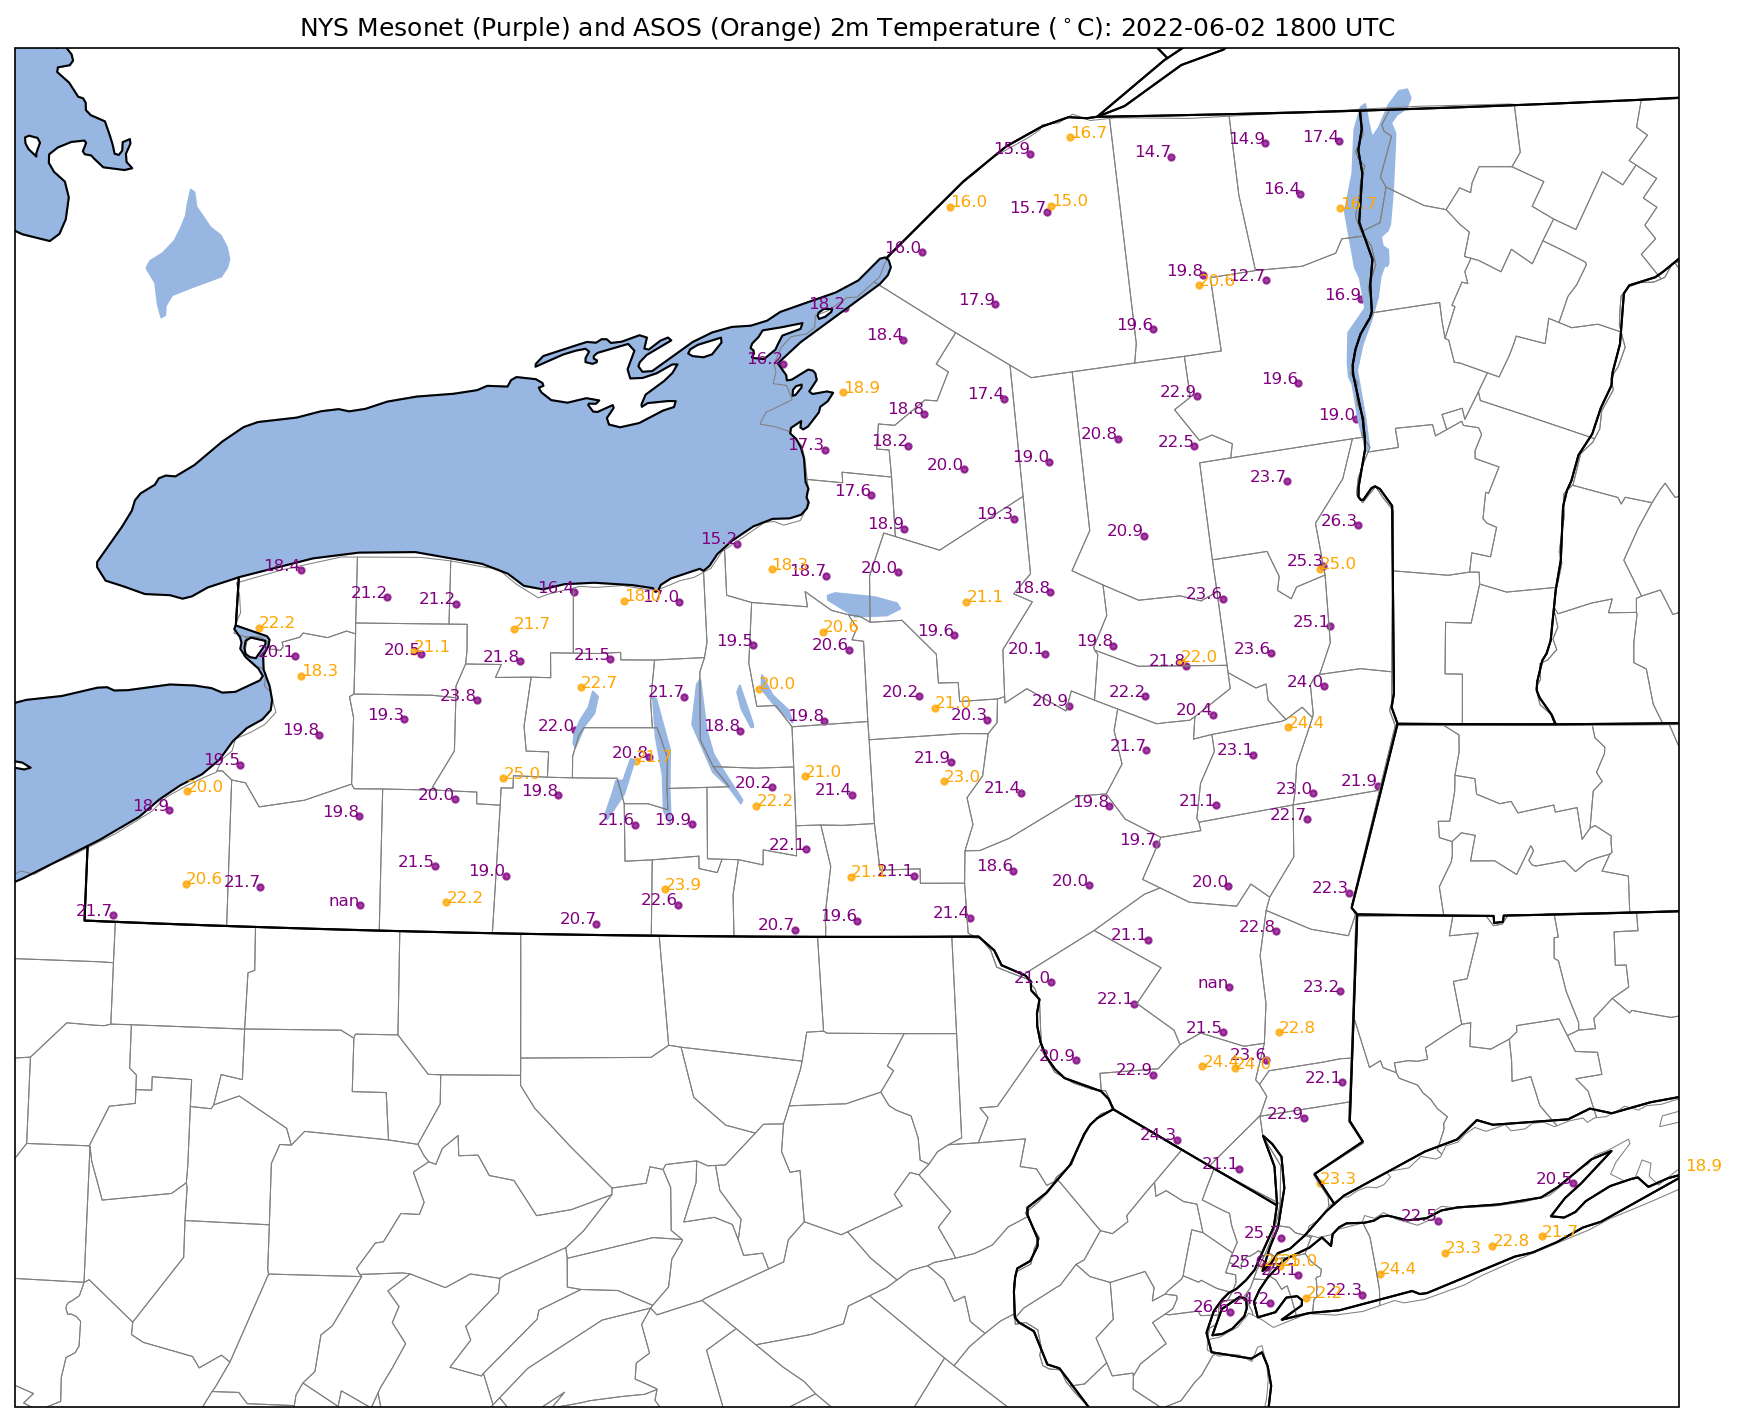

In [8]:
res = '50m'

fig = plt.figure(figsize=(18,12),dpi=150) # Increase the dots per inch from default 100 to make plot easier to read
ax = fig.add_subplot(1,1,1,projection=projMap)

ax.set_title(f'NYS Mesonet (Purple) and ASOS (Orange) 2m Temperature ($^\circ$C): ' + timeStr)

ax.set_extent ([lonW,lonE,latS,latN], projData)
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.LAKES.with_scale(res))
ax.add_feature(USCOUNTIES.with_scale('20m'),edgecolor='grey', linewidth=0.5 )
ax.add_feature (cfeature.STATES.with_scale(res))

# NYSM data
# Plot locations of sites; scatter method takes arrays of lons/lats 
ax.scatter(lonNYSM,latNYSM,s=9,c='purple',alpha=0.75, transform=projData);
for count, val in enumerate(t2mNYSM):
# Plot values; text method does not accept arrays
    ax.text(lonNYSM[count],latNYSM[count],val,horizontalalignment='right',transform=projData,fontsize=8, color='purple')

# ASOS data    
ax.scatter(lonASOS,latASOS,s=9,c='orange',alpha=0.75, transform=projData);
for count, val in enumerate(t2mASOS):
    ax.text(lonASOS[count],latASOS[count],val,horizontalalignment='left',transform=projData,fontsize=8, color='orange');
